In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option("max_rows",1000000)
pd.set_option("max_columns",100)

In [3]:
df=pd.read_csv("LoanPrediction.csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,f,0,0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,f,0,0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,f,0,0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,f,0,0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN
4,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,f,0,0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,1,INDIVIDUAL,0,NaN,NaN,NaN


In [5]:
df = df.drop(['id','member_id','url','policy_code'],axis = 1)

In [6]:
cat_cols = df.select_dtypes(include='object').columns

In [7]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [8]:
df.shape[1]

49

In [9]:
cat_cols.shape

(19,)

In [10]:
num_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']

In [13]:
c= np.concatenate(['num_cols','cat_cols'])

ValueError: zero-dimensional arrays cannot be concatenated

In [14]:
num_cols.melt

AttributeError: 'list' object has no attribute 'melt'

In [37]:
pd.(num_cols).shape

(29,)

In [9]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-2015,161.03,NaN,Sep-2015,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


Data Imputation


In [10]:
miss_val = df.isnull().sum()
miss_val[miss_val >0]

emp_title                      13931
emp_length                      9897
title                             13
revol_util                       199
last_pymnt_d                     527
next_pymnt_d                  252971
last_credit_pull_d                21
collections_12_mths_ex_med        56
tot_coll_amt                   63708
tot_cur_bal                    63708
total_rev_hi_lim               63708
dtype: int64

In [11]:
df = df.drop('next_pymnt_d',axis = 1) # since the whole column is missing

In [5]:
sns.countplot(df.emp_title)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001211AFA3BF8> (for post_execute):


ValueError: 
T$$ - ACHWorks
 ^
Expected end of text (at char 1), (line:1, col:2)

ValueError: 
T$$ - ACHWorks
 ^
Expected end of text (at char 1), (line:1, col:2)

<Figure size 432x288 with 1 Axes>

In [12]:
df.emp_title = df.emp_title.replace(np.NaN,'Manager') # imputing with mode

In [13]:
df.emp_length = df.emp_length.fillna('< 1 year') # the missing values may have 0 years of employment hence we fill it with
# < 1 year

In [14]:
df.title = df.title.replace(np.NaN,'Debt consolidation') # imputing with mode

In [15]:
df["revol_util"]= df["revol_util"].fillna(df["revol_util"].mean()) # imputing with mean

In [16]:
df.last_pymnt_d.fillna(df.last_pymnt_d.mode()[0],inplace=True) # imputing with mode

In [17]:
df.last_credit_pull_d.fillna(df.last_credit_pull_d.mode()[0],inplace = True) # imputing with mode (mode has 40% values 
# replacing 0.2 percent of missing values is fine)

In [18]:
df.collections_12_mths_ex_med.fillna(df.collections_12_mths_ex_med.median(),inplace = True) # imputing with median

In [19]:
df["tot_cur_bal"] = df["tot_cur_bal"].fillna(df["tot_cur_bal"].mean()) # imputing with mean (we have multiple ways to 
# imupte this eg. KNN, MICE,mean,replace with 0 whichever is best for the model)


In [20]:
df["tot_coll_amt"] = df["tot_coll_amt"].fillna(0) # imputing with 0 because we believe mojority of the borrowers
# never owed any amount.

In [21]:
df["total_rev_hi_lim"] = df["total_rev_hi_lim"].fillna(df["total_rev_hi_lim"].mean()) # imputing with mean


In [22]:
df['home_ownership']=df['home_ownership'].replace(['OTHER','NONE','ANY'],'MORTGAGE')## MODE IMPUTATION 

Exploratory Data Analysis

Loan Status

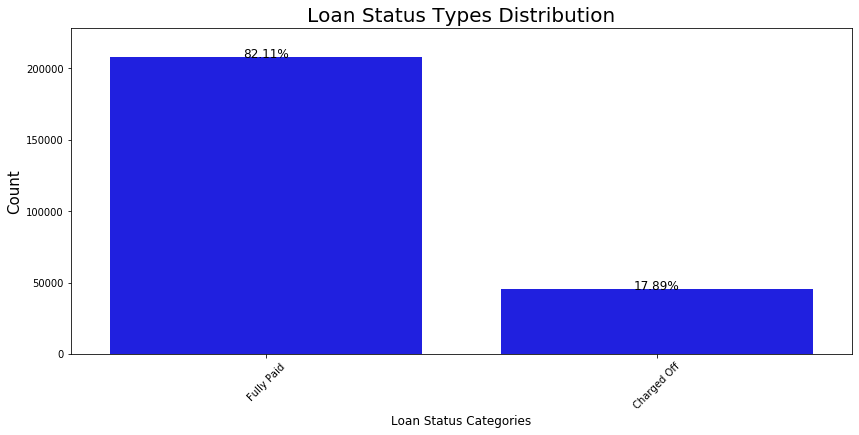

In [23]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show() 

Purpose

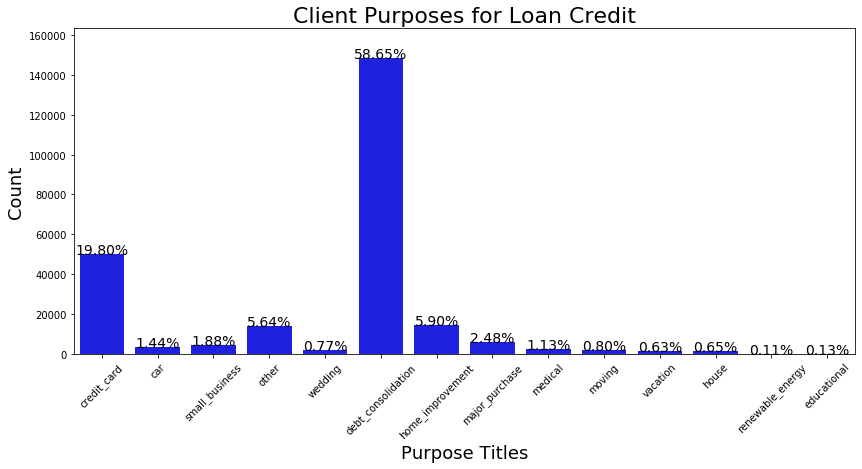

In [24]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

The top 3 purposes are:

    58.65% of the Loans are for Debt Consolidation
    
    19.80% are to pay Credit Card
    
    5.90% towards Home Improvement

Loan Amount and Interest Rate

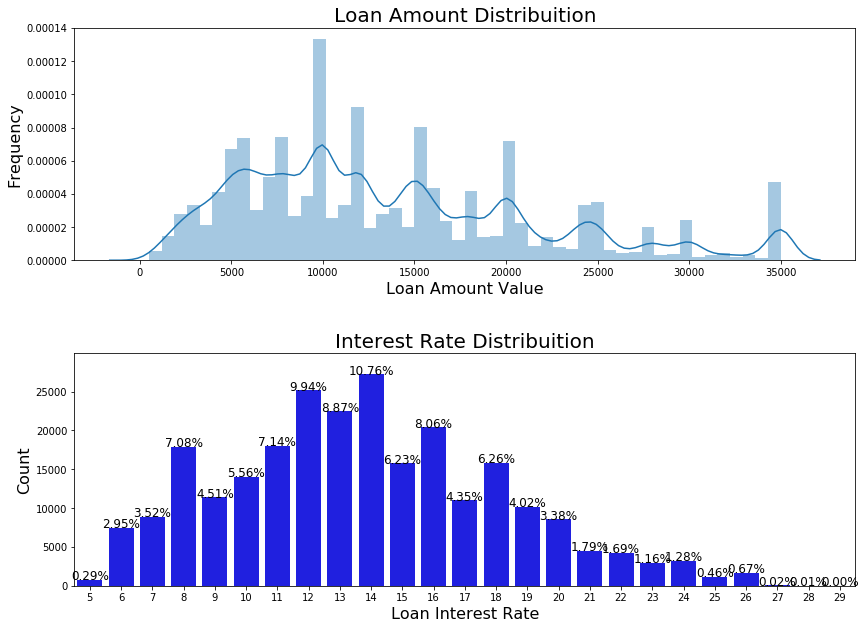

In [25]:
df['int_round'] = df['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

We can note that a big part of the loans are values until USD 10,000 

Also, many part of all loans have interest between 7% and 14%;

In Interest Rate: The most common is 14%, followed by 12% and 13%.

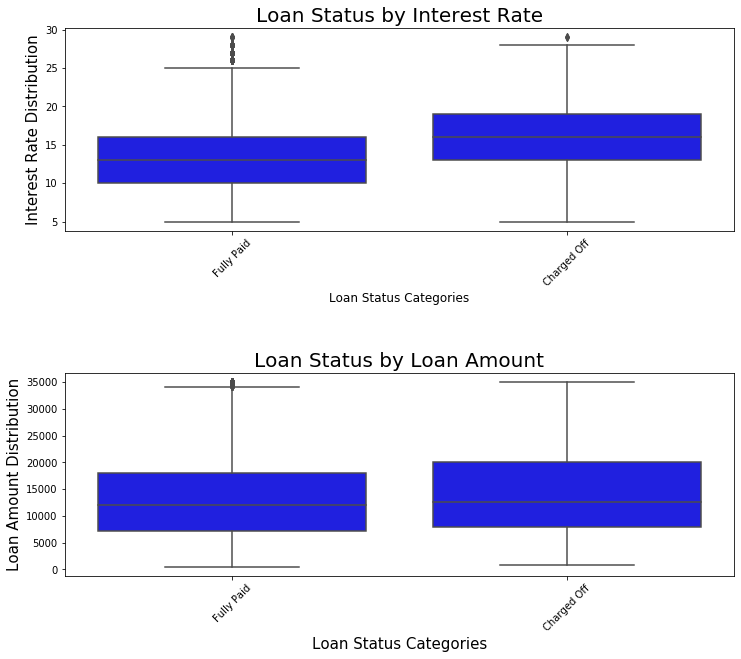

In [26]:
plt.figure(figsize = (12,16))


plt.subplot(311)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(312)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Comparing Grade and Interest rate

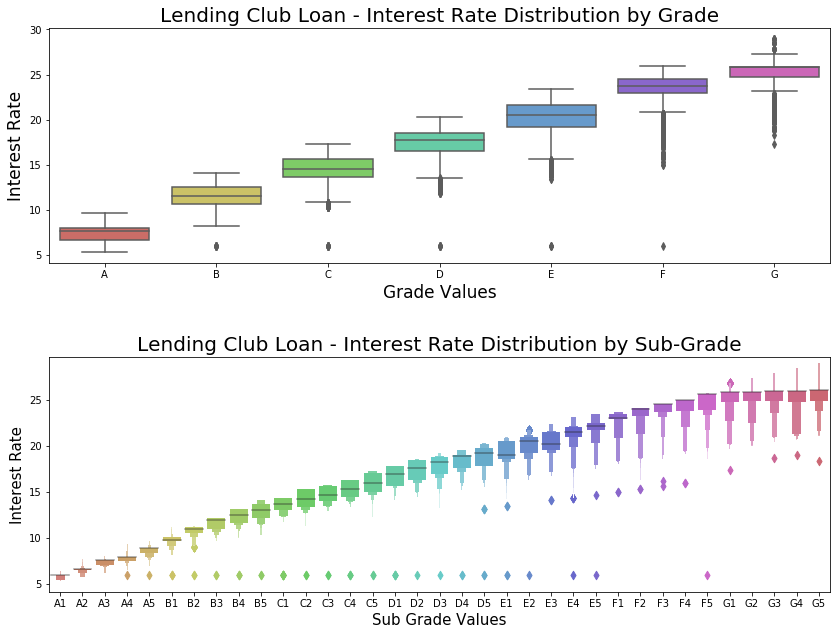

In [27]:
plt.figure(figsize=(14,16))
plt.subplot(312)
g1 = sns.boxplot(x='grade', y="int_rate",data=df, 
               palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)


order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.subplot(313)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df, 
                   palette="hls",order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

We can see that as grade  increases the Interest Rate increases as well.

Same holds good for Sub grade.

Emp_length 

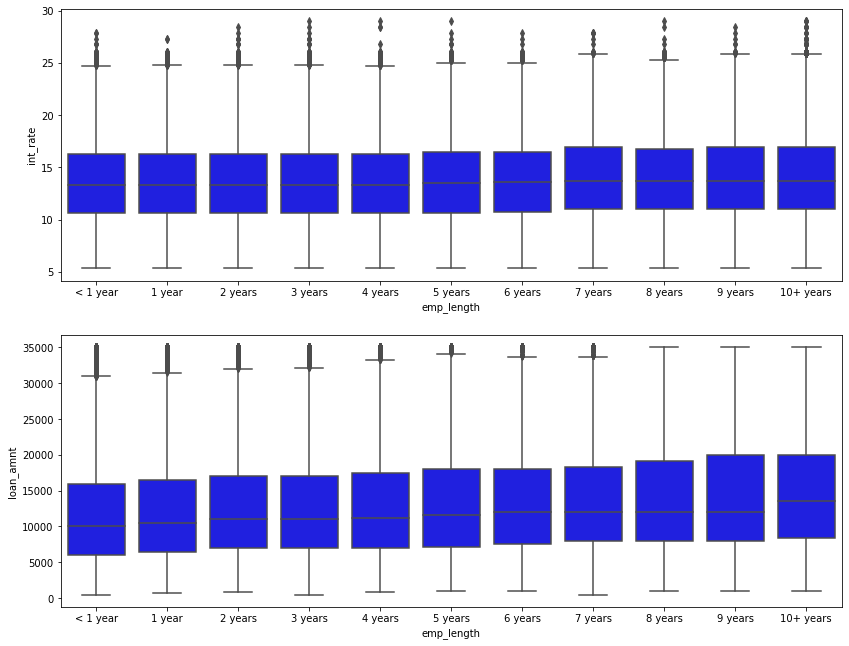

In [28]:
emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))
g = sns.boxplot(x="emp_length", y="int_rate", data=df,
                ax=ax[0], color='blue',
                order=emp_ord)

z = sns.boxplot(x="emp_length", y="loan_amnt",data=df, 
                   ax=ax[1], color='blue',
                   order=emp_ord)

plt.show()

 We can see that the years do not influence the interest rate but it have a slightly difference considering the loan_amount patterns.

Term

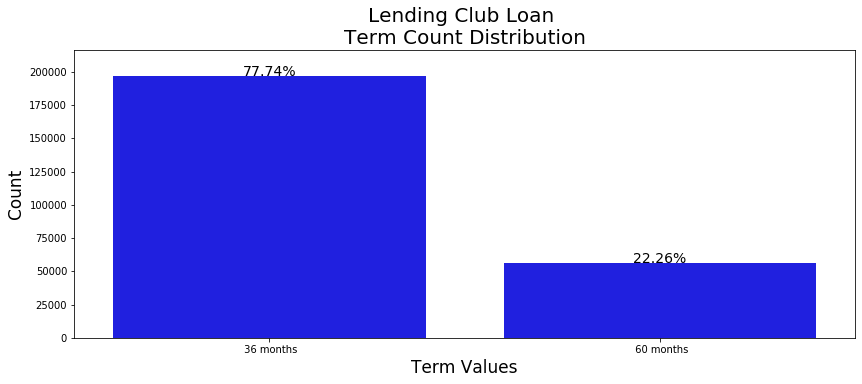

In [29]:
order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,18))


plt.subplot(311)
g = sns.countplot(x="term", data=df,color='blue')
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_title("Lending Club Loan \nTerm Count Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)
plt.show()

We can see that people prefer 36 month term over 60 month term.

Open_acc

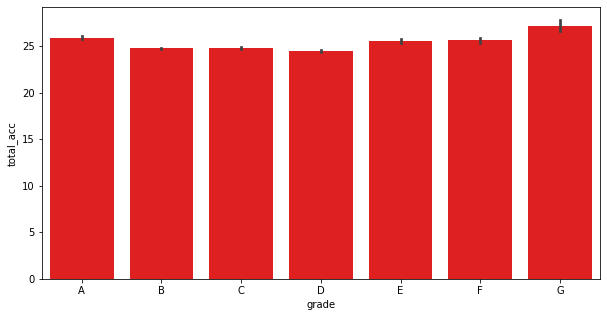

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x = df['grade'], y = df['total_acc'], color = 'r',order=['A','B','C','D','E','F','G'])
plt.show()

We can infer that grade G borrowers have more open credit lines.

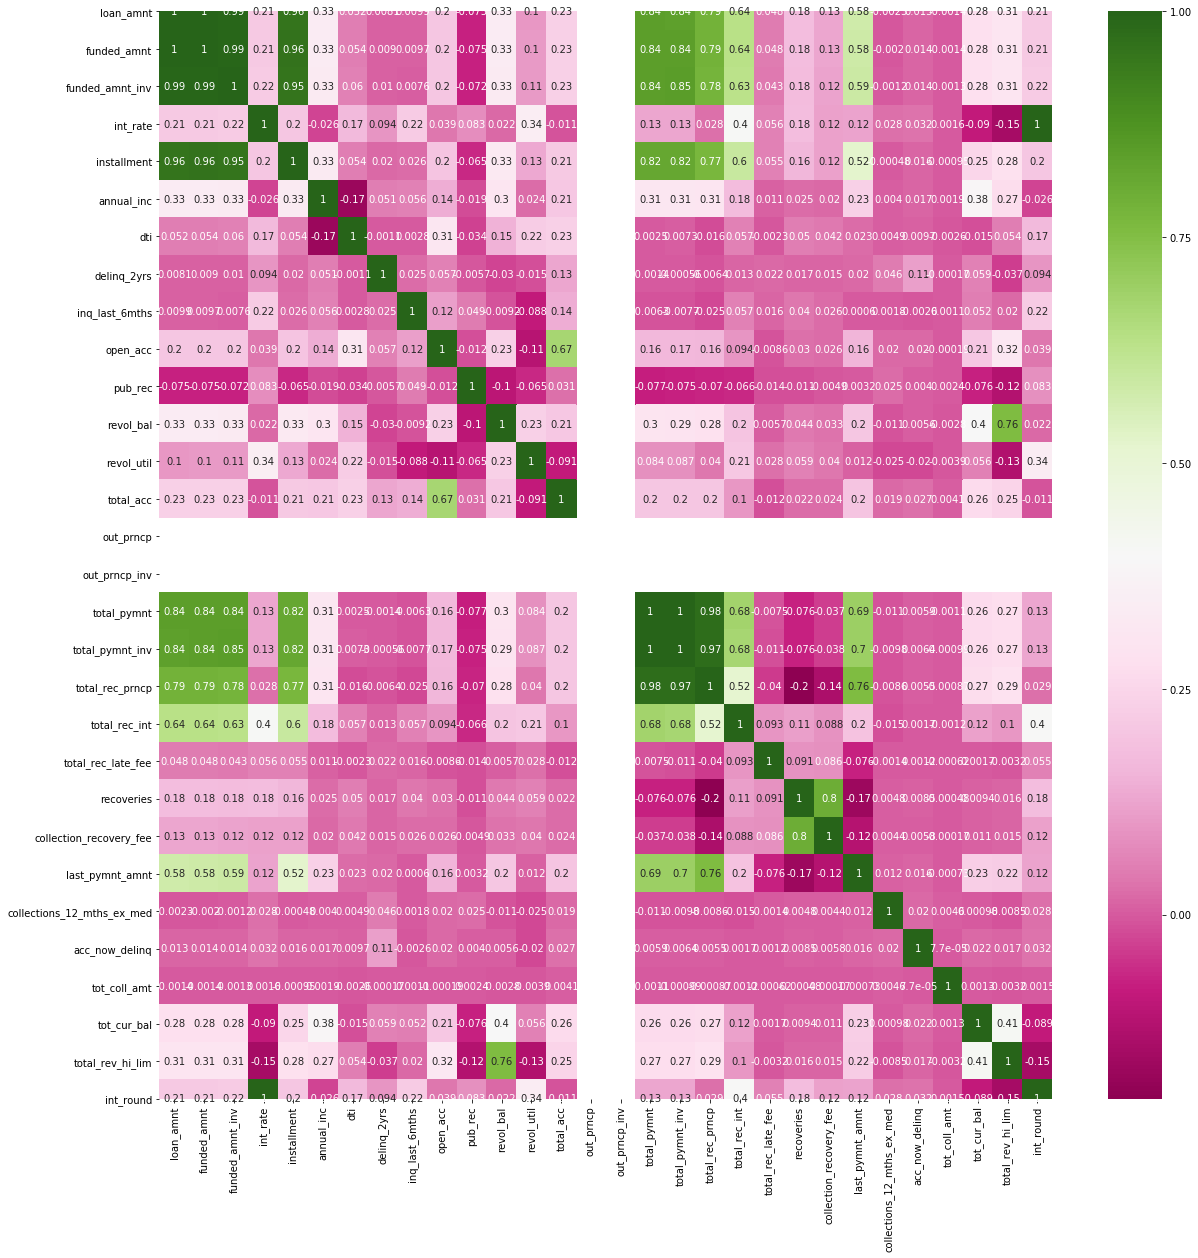

In [31]:

fb = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(fb,cmap="PiYG", annot = True)
plt.show()

We can see that there are many redundent features throught this heatmap.

Data Wrangling

In [32]:
cat_cols = ['sub_grade', 'emp_title',
       'home_ownership', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code',
       'earliest_cr_line', 'initial_list_status', 'application_type']

In [33]:
def num_term(x):  # encoding term
    if x ==' 36 months':
        x = str(x).replace(' 36 months','0')
        return int(x)
    else:
        x = str(x).replace(' 60 months','1')
        return int(x)

df['term']=df['term'].apply(num_term)

In [34]:
df.term.value_counts()

0    196658
1     56313
Name: term, dtype: int64

In [35]:
def num_grade(x): # encoding grade
    if x =='A':
        x = str(x).replace('A','1')
        return int(x)
    elif x =='B':
        x = str(x).replace('B','2')
        return int(x)
    elif x =='C':
        x = str(x).replace('C','3')
        return int(x)
    elif x =='D':
        x = str(x).replace('D','4')
        return int(x)
    elif x =='E':
        x = str(x).replace('E','5')
        return int(x)
    elif x =='F':
        x = str(x).replace('F','6')
        return int(x)
    elif x =='G':
        x = str(x).replace('G','7')
        return int(x)
    

df['grade']=df['grade'].apply(num_grade)

In [36]:
df.grade.value_counts()

2    76065
3    65320
1    42296
4    40506
5    19186
6     7660
7     1938
Name: grade, dtype: int64

In [37]:
df.shape

(252971, 49)

In [38]:
def num_emp_length(x):
    if x =='10+ years':
        x = str(x).replace('10+ years','10')
        return float(x)
    elif x == '2 years':
        x = str(x).replace('2 years','2')
        return float(x)
    elif x == '< 1 year':
        x = str(x).replace('< 1 year','0')
        return float(x)
    elif x == '1 year':
        x = str(x).replace('1 year','1')
        return float(x)
    elif x == '3 years':
        x = str(x).replace('3 years','3')
        return float(x)
    elif x == '5 years':
        x = str(x).replace('5 years','5')
        return float(x)
    elif x == '4 years':
        x = str(x).replace('4 years','4')
        return float(x)
    elif x == '6 years':
        x = str(x).replace('6 years','6')
        return float(x)
    elif x == '7 years':
        x = str(x).replace('7 years','7')
        return float(x)
    elif x == '8 years':
        x = str(x).replace('8 years','8')
        return float(x)
    elif x == '9 years':
        x = str(x).replace('9 years','9')
        return float(x)
    else:
        return 10## Mode Imputation has been done for null values

df['emp_length']=df['emp_length'].apply(num_emp_length)

In [39]:
df['purpose']=df['purpose'].replace('house','home_improvement')
df['purpose']=df['purpose'].replace(['car','medical','moving','vacation','renewable_energy','educational','wedding'],'major_purchase')

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
for i in cat_cols:
    df[i] = le.fit_transform(df[i])

In [43]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [44]:
le.fit(df['region'])
df['region']=le.transform(df['region'])

In [45]:
df = df.drop('addr_state',axis = 1)

In [46]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line']=df['earliest_cr_line'].dt.year

In [47]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d']=df['issue_d'].dt.year

In [48]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_d']=df['last_pymnt_d'].dt.year

In [49]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
df['last_credit_pull_d']=df['last_credit_pull_d'].dt.year

In [50]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_round,region
0,5000.0,5000.0,4975.0,0,10.65,162.87,2,6,61620,10.0,2,24000.0,2,2011,1,0,0,6810,766,27.65,0.0,1970,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015,171.62,2016,0.0,0,0.0,0.0,138331.152328,29709.117397,11,3
1,2500.0,2500.0,2500.0,1,15.27,59.83,3,13,85613,0.0,2,30000.0,1,2011,0,0,3,38224,288,1.00,0.0,1970,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013,119.66,2013,0.0,0,0.0,0.0,138331.152328,29709.117397,15,2
2,2400.0,2400.0,2400.0,0,15.96,84.33,3,14,61620,10.0,2,12252.0,0,2011,1,0,5,46128,544,8.72,0.0,1970,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014,649.91,2016,0.0,0,0.0,0.0,138331.152328,29709.117397,16,0
3,10000.0,10000.0,10000.0,0,13.49,339.31,3,10,1495,10.0,2,49200.0,1,2011,1,0,4,45889,806,20.00,0.0,1970,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015,357.48,2015,0.0,0,0.0,0.0,138331.152328,29709.117397,13,4
4,5000.0,5000.0,5000.0,0,7.90,156.46,1,3,109074,3.0,2,36000.0,1,2011,1,0,3,25744,759,11.20,0.0,1970,3.0,9.0,0.0,7963.0,28.3,12.0,0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,2015,161.03,2015,0.0,0,0.0,0.0,138331.152328,29709.117397,8,3


In [51]:
df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,int_round,region
252966,4200.0,4200.0,4200.0,0,15.99,147.64,4,16,130199,10.0,0,48000.0,2,2015,0,0,3,24311,724,36.93,0.0,1970,0.0,13.0,0.0,12943.0,63.4,45.0,0,0.0,0.0,1026.02,1026.02,667.96,358.06,0.0,0.0,0.0,2015,147.64,2016,0.0,0,0.0,0.0,207975.0,20400.0,16,4
252967,10775.0,10775.0,10775.0,0,6.03,327.95,1,0,24973,0.0,2,54000.0,0,2015,1,0,1,12691,304,13.22,1.0,1970,0.0,9.0,0.0,10776.0,25.8,21.0,1,0.0,0.0,11071.87,11071.87,10775.00,296.87,0.0,0.0,0.0,2015,9439.34,2015,0.0,0,0.0,0.0,24696.0,41700.0,6,2
252968,6225.0,6225.0,6225.0,0,16.49,220.37,4,17,74471,2.0,2,27000.0,1,2015,1,0,1,12691,309,18.58,0.0,1970,1.0,3.0,0.0,1756.0,97.6,4.0,0,0.0,0.0,7050.46,7050.46,6225.00,825.46,0.0,0.0,0.0,2015,4858.17,2015,0.0,0,0.0,0.0,8357.0,1800.0,16,2
252969,4000.0,4000.0,4000.0,0,8.67,126.59,2,5,57036,10.0,0,50000.0,2,2015,1,0,3,5577,845,12.63,0.0,1970,0.0,11.0,1.0,1700.0,5.6,30.0,0,0.0,0.0,4158.02,4158.02,4000.00,158.02,0.0,0.0,0.0,2015,3655.51,2015,0.0,0,0.0,0.0,18979.0,30100.0,9,4
252970,10850.0,10850.0,10850.0,0,19.24,399.04,5,21,61620,0.0,1,32000.0,2,2015,0,0,1,12691,402,29.44,0.0,1970,1.0,9.0,0.0,6987.0,41.6,20.0,0,0.0,0.0,2396.05,2396.05,1405.77,990.28,0.0,0.0,0.0,2015,25.00,2016,0.0,0,0.0,972.0,53777.0,16800.0,19,0


Baseline model

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y = df.loan_status
X = df.drop('loan_status',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier(random_state=1,n_estimators=100)

In [55]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [56]:
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve

In [58]:
print(accuracy_score(y_test,y_pred)*100)

99.76282085068256


In [59]:
print(model.score(X_train,y_train))

1.0


In [60]:
print(confusion_matrix(y_test,y_pred))

[[13390   179]
 [    1 62322]]


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13569
           1       1.00      1.00      1.00     62323

    accuracy                           1.00     75892
   macro avg       1.00      0.99      1.00     75892
weighted avg       1.00      1.00      1.00     75892



In [62]:
roc_auc_score(y_test,y_pred)

0.9933960601155318

There are alot of redundent columns that are causing the baseline model to get such an accuracy. 
Removing those redundent cols and applying feature selection and engineering techniques to improve the model.

Statistical Test For Features


In [63]:
from scipy.stats import f_oneway

In [64]:
loan_1=df[df['loan_status']==1]
loan_0=df[df['loan_status']==0]

In [65]:
l=[]
for col in num_cols:
    pvalue=f_oneway(loan_1[col],loan_0[col])[1]
    print(col,":",pvalue)
    if pvalue > 0.05:
        l.append(col)
print(l)

loan_amnt : 3.413060354474179e-181
funded_amnt : 2.1648738529453434e-180
funded_amnt_inv : 6.80908234347769e-170
int_rate : 0.0
installment : 8.228144939965797e-105
annual_inc : 8.342057471786995e-195
dti : 0.0
delinq_2yrs : 1.164227173887489e-16
inq_last_6mths : 2.2609086441761617e-183
open_acc : 1.8952529984147523e-06
pub_rec : 0.3877197274967864
revol_bal : 0.014706869857424204
revol_util : 0.0
total_acc : 9.689807675655435e-63
out_prncp : nan
out_prncp_inv : nan
total_pymnt : 0.0
total_pymnt_inv : 0.0
total_rec_prncp : 0.0
total_rec_int : 3.2175060741578723e-118
total_rec_late_fee : 0.0
recoveries : 0.0
collection_recovery_fee : 0.0
last_pymnt_amnt : 0.0
collections_12_mths_ex_med : 0.00039813329863209226
acc_now_delinq : 0.002008775975970816
tot_coll_amt : 0.534777651657736
tot_cur_bal : 1.0352583708491997e-240
total_rev_hi_lim : 1.6200688187118752e-126
['pub_rec', 'tot_coll_amt']


C:\Users\Dhruv\Anaconda3\lib\site-packages\scipy\stats\stats.py:3235: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


Pub_rec and tot_coll_amt did not pass the significance test so they can be dropped. 

out_prncp and out_prncp_inv can be dropped too since they have only single value.


In [66]:
df.shape

(252971, 49)

In [67]:
df = df.drop(['pub_rec','tot_coll_amt','out_prncp','out_prncp_inv'],axis = 1)

In [68]:
df.shape

(252971, 45)

In [69]:
from scipy.stats import chi2_contingency

In [70]:
k=[]
for i in cat_cols:
    pvalue  = chi2_contingency(pd.crosstab(df['loan_status'],df[i]))[1]
    print(i,pvalue)
    if pvalue>0.05:
        k.append(i)

sub_grade 0.0
emp_title 1.3611356044903936e-23
home_ownership 5.219581429449694e-150
verification_status 8.795600293672004e-295
loan_status 0.0
pymnt_plan 0.7929400681423969
purpose 4.1713318529154184e-175
title 0.6465025311897227
zip_code 9.513197849908565e-109
earliest_cr_line 1.0
initial_list_status 2.5230359497215956e-05
application_type 0.4020616940572538


In [71]:
k

['pymnt_plan', 'title', 'earliest_cr_line', 'application_type']

'pymnt_plan', 'title', 'earliest_cr_line' and 'application_type' did not pass the significance test so we can drop them.


In [72]:
df = df.drop(['pymnt_plan', 'title', 'earliest_cr_line', 'application_type'],axis = 1)

In [73]:
df.shape

(252971, 41)

Working on redundant and Correlated Features

In [74]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()


,loan_amnt,funded_amnt,funded_amnt_inv
count,252971.000000,252971.000000,252971.000000
mean,13562.768855,13522.193749,13429.174497
std,8131.729531,8109.211388,8127.682956
min,500.000000,500.000000,0.000000
25%,7200.000000,7200.000000,7200.000000
50%,12000.000000,12000.000000,11975.000000
75%,18250.000000,18075.000000,18000.000000
max,35000.000000,35000.000000,35000.000000


Since we can see that all 3 features are homogenous in nature as they have similar mean and standard deviation, these are redundant columns. So we can drop any two of these.

In [75]:
df = df.drop(['funded_amnt','funded_amnt_inv'],axis = 1)

In [76]:
df.drop('emp_title',1,inplace=True)
## As emp_title is a catergorical feature having different values, there is no specific values to predict the target variable.

In [77]:
df[['total_pymnt','total_pymnt_inv']].describe()

,total_pymnt,total_pymnt_inv
count,252971.000000,252971.000000
mean,13609.603960,13511.987257
std,9483.853558,9484.295464
min,0.000000,0.000000
25%,6400.055455,6307.915000
50%,11453.600000,11364.520000
75%,18619.100000,18503.000000
max,57777.579870,57777.580000


Since both are redundant features we can drop one.

In [78]:
df = df.drop('total_pymnt_inv',axis= 1)

In [79]:
df.shape

(252971, 37)

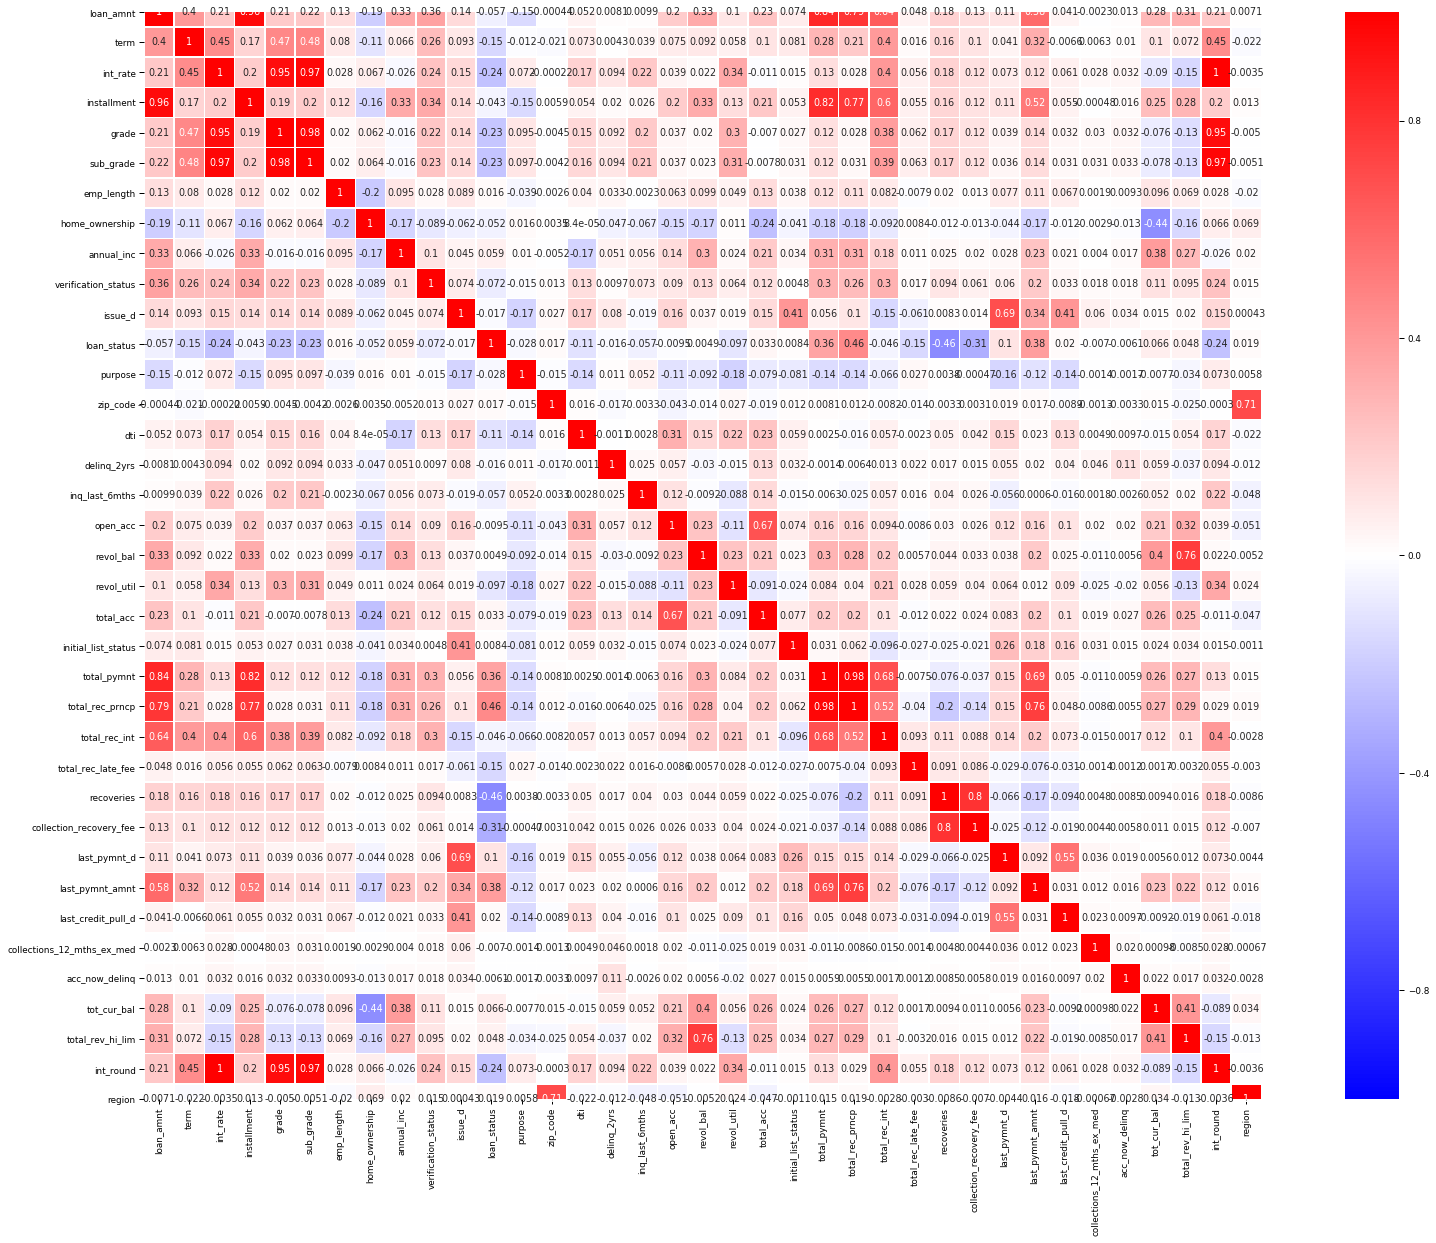

In [80]:
plt.figure(figsize=(30,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df.corr(),annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)


It can be seen from the heat amp that loan amount and installment have a very high correlation amongst each other (0.94). This is intuitive since a person who takes a large sum of loan would require extra time to repay it back. Also, interest rate, sub grade and grade have a very high correlation between them. This is obvious since interest rate is decided by grades once the grades are decided, a subgrade is assigned to that loan (leading to high correlation).

Let's drop the three categories alongwith term and verification status(since it doesn't provide any valuable info) for further analysis.

In [81]:
df.drop(['installment','sub_grade','verification_status','term']
           , axis=1, inplace = True)

In [82]:
df.shape

(252971, 33)

In [83]:
df = df.drop(['issue_d','zip_code','last_pymnt_d','last_credit_pull_d','int_round'],axis = 1) 
#removing date cols, zip code is not required, int_round is correlating column

In [84]:
df = df.drop(['total_pymnt','total_rec_int','open_acc','total_rec_int'],axis = 1) # highly correalted to loan amount and open acc is to total acc

In [85]:
df.drop(['total_rec_prncp','grade'],axis = 1,inplace=True) #highly correalted

In [86]:
df.drop(['total_rev_hi_lim'],axis =1,inplace = True) # correlated to revol bal

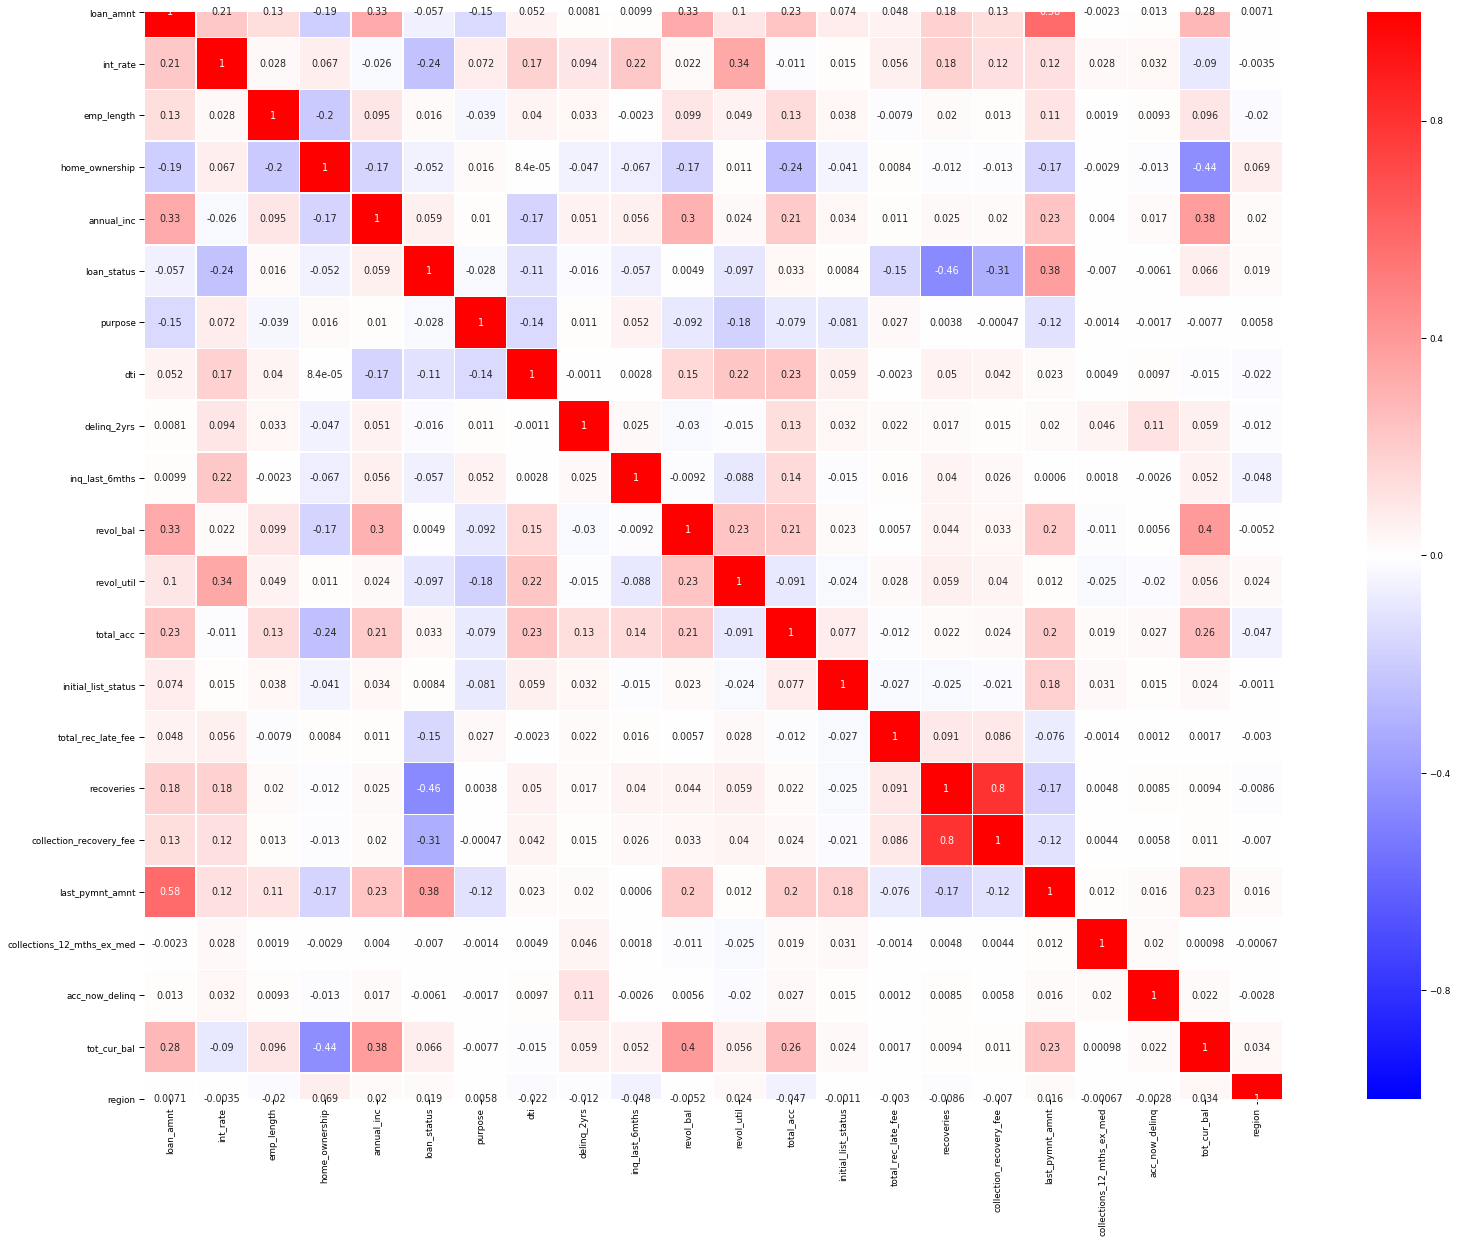

In [87]:
plt.figure(figsize=(30,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df.corr(),annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)


Most highly correlated and redundant features have been removed to get a cleaner data.

In [88]:
df.shape

(252971, 22)

New Baseline model (Model 1)

In [89]:
df1 = df.copy()

In [90]:
y = df1.loan_status
X = df1.drop('loan_status',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [92]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

In [93]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }


for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('____________________________________________________________________________________________________')

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression :

Accuracy train =  0.9202107533925536
Accuracy test =  0.9214937015759237
Precision =  0.9324525464561371
Recall =  0.9750332942894276

F1 Score =  0.9532676560097889
Roc-Auc score =  0.8253086730861982
Confusion matrix: 
[[ 9167  4402]
 [ 1556 60767]]

               precision    recall  f1-score   support

           0       0.85      0.68      0.75     13569
           1       0.93      0.98      0.95     62323

    accuracy                           0.92     75892
   macro avg       0.89      0.83      0.85     75892
weighted avg       0.92      0.92      0.92     75892


____________________________________________________________________________________________________
Decision Tree :

Accuracy train =  1.0
Accuracy test =  0.9436172455594792
Precision =  0.9675990075081365
Recall =  0.9636089405195514

F1 Score =  0.9655998520769521
Roc-Auc score =  0.907701736086292
Confusion matrix: 
[[11558  2011]
 [ 2268 60055]]

               precision    recall  f1-s

In this we can see that XG Boost and Gradient Boosting give almost similar accuracy and F1-Score. These are the best performing algorithmns in this model.

Pros of this model:
    
    It has the best prediction power.

Cons of this model:

    This model is quite complex. 

Feature Selection (Recursive Feature Elimination) (Model 2)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [95]:
df2 = df.copy()

In [96]:
df2.shape

(252971, 22)

In [97]:
y = df2.loan_status
X = df2.drop('loan_status',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [98]:
clf_rf = RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [99]:
rfe = RFE(estimator=clf_rf,n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [100]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
sf = selected_rfe_features.sort_values(by='Ranking')[:10] #top 10 features

In [101]:
sf

,Feature,Ranking
0,loan_amnt,1
16,last_pymnt_amnt,1
15,collection_recovery_fee,1
14,recoveries,1
19,tot_cur_bal,1
9,revol_bal,1
10,revol_util,1
4,annual_inc,1
1,int_rate,1
6,dti,1


In [102]:
y = df2.loan_status
X = df2[['loan_amnt','last_pymnt_amnt','collection_recovery_fee','recoveries','tot_cur_bal','revol_bal',
     'revol_util','annual_inc','int_rate','dti']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [103]:
algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }


for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('____________________________________________________________________________________________________')

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression :

Accuracy train =  0.9175226876140028
Accuracy test =  0.9184499024930164
Precision =  0.9267317399501308
Recall =  0.978017746257401

F1 Score =  0.9516842968109607
Roc-Auc score =  0.8114349914867224
Confusion matrix: 
[[ 8750  4819]
 [ 1370 60953]]

               precision    recall  f1-score   support

           0       0.86      0.64      0.74     13569
           1       0.93      0.98      0.95     62323

    accuracy                           0.92     75892
   macro avg       0.90      0.81      0.85     75892
weighted avg       0.92      0.92      0.91     75892


____________________________________________________________________________________________________
Decision Tree :

Accuracy train =  1.0
Accuracy test =  0.945567385231645
Precision =  0.9679769678643806
Recall =  0.965662756927619

F1 Score =  0.966818477553676
Roc-Auc score =  0.9094656182751442
Confusion matrix: 
[[11578  1991]
 [ 2140 60183]]

               precision    recall  f1-scor

In this model also we see that XG Boost and Gradient Boost perform very well in terms of Accuracy and F1-Score. They are normal fitted. These algorithmns are able to classify very well.

Pros of this model:

    Since we choose only 10 features, the model is not complex.
    
    The features are statistically significant.
    
Cons  of this model: 

    We could miss a feature that would improve the overall model performance.

Principal Component Analysis

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()

In [151]:
df3 = df.copy()

In [152]:
df3.head()

,loan_amnt,int_rate,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_cur_bal,region
0,5000.0,10.65,10.0,2,24000.0,1,0,27.65,0.0,1.0,13648.0,83.7,9.0,0,0.00,0.00,0.00,171.62,0.0,0.0,138331.152328,3
1,2500.0,15.27,0.0,2,30000.0,0,3,1.00,0.0,5.0,1687.0,9.4,4.0,0,0.00,117.08,1.11,119.66,0.0,0.0,138331.152328,2
2,2400.0,15.96,10.0,2,12252.0,1,5,8.72,0.0,2.0,2956.0,98.5,10.0,0,0.00,0.00,0.00,649.91,0.0,0.0,138331.152328,0
3,10000.0,13.49,10.0,2,49200.0,1,4,20.00,0.0,1.0,5598.0,21.0,37.0,0,16.97,0.00,0.00,357.48,0.0,0.0,138331.152328,4
4,5000.0,7.90,3.0,2,36000.0,1,3,11.20,0.0,3.0,7963.0,28.3,12.0,0,0.00,0.00,0.00,161.03,0.0,0.0,138331.152328,3


In [153]:
n_col = ['loan_amnt', 'int_rate','annual_inc','dti','revol_bal', 'revol_util', 'total_acc'
         ,'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','tot_cur_bal','last_pymnt_amnt']

In [154]:
for i in n_col: #transforming to treat outliers
    df3[i] = np.sqrt(df3[i])

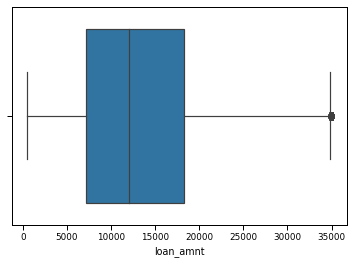

In [155]:
sns.boxplot(df.loan_amnt)

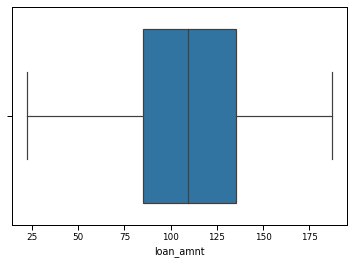

In [156]:
sns.boxplot(df3.loan_amnt)

In [157]:
X=df3.drop('loan_status',1)
y=df3['loan_status']

In [158]:
Xtrain=X[n_col]
Xtrain.shape

(252971, 12)

In [159]:
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)

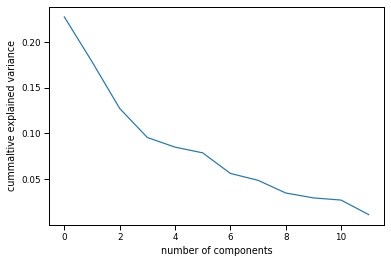

In [160]:
pca = PCA()
Xtrain = pca.fit_transform(Xtrain)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cummaltive explained variance')
plt.show()

From the above graph we take number of components as 3.

In [161]:
Xtrain=X[n_col]
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)

In [162]:
pca = PCA(n_components=3)
Xtrain = pca.fit_transform(Xtrain)

In [163]:
c_cols=['home_ownership','initial_list_status','emp_length','purpose',
          'delinq_2yrs','inq_last_6mths','collections_12_mths_ex_med','acc_now_delinq','region']
Xtrain=pd.DataFrame(Xtrain)
Xtrain1=X[c_cols].copy()

In [164]:
X=pd.concat([Xtrain,Xtrain1],axis=1)

In [165]:
X.head()

,0,1,2,home_ownership,initial_list_status,emp_length,purpose,delinq_2yrs,inq_last_6mths,collections_12_mths_ex_med,acc_now_delinq,region
0,-1.620973,0.415109,-1.589522,2,0,10.0,0,0.0,1.0,0.0,0.0,3
1,-3.729096,-0.036334,2.017833,2,0,0.0,3,0.0,5.0,0.0,0.0,2
2,-2.664858,0.366891,-1.269467,2,0,10.0,5,0.0,2.0,0.0,0.0,0
3,-0.834441,0.506644,0.780837,2,0,10.0,4,0.0,1.0,0.0,0.0,4
4,-2.220120,-0.647807,0.824250,2,0,3.0,3,0.0,3.0,0.0,0.0,3


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [167]:
algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }


for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('____________________________________________________________________________________________________')

Logistic Regression :

Accuracy train =  0.9163367762411128
Accuracy test =  0.9171981236493965
Precision =  0.9216184901515265
Recall =  0.9827511512603694

F1 Score =  0.9512036030439508
Roc-Auc score =  0.7994307012842492
Confusion matrix: 
[[ 8360  5209]
 [ 1075 61248]]

               precision    recall  f1-score   support

           0       0.89      0.62      0.73     13569
           1       0.92      0.98      0.95     62323

    accuracy                           0.92     75892
   macro avg       0.90      0.80      0.84     75892
weighted avg       0.92      0.92      0.91     75892


____________________________________________________________________________________________________
Decision Tree :

Accuracy train =  1.0
Accuracy test =  0.8929136140831708
Precision =  0.9373749112273226
Recall =  0.931855013397943

F1 Score =  0.9346068120921475
Roc-Auc score =  0.8229545536442143
Confusion matrix: 
[[ 9689  3880]
 [ 4247 58076]]

               precision    recall  f1-s

PCA helps in dimensionality reduction. Here we were able to reduce 12 continous features into 3 features.
We can see that the overall F1-Score for predicting Charged-off borrowers has reduced. Yet the best performing algorithm is XGBoost and Gradient Boost which has a pretty good F1-score and Roc-auc score compared to other algorithmns. 

Pros of this model:
    
    Reduces model complexity.
    
    Reduces noise.
    
Cons of this model:
    
    Unable to properly predict charged off borrowers. Misclassification takes place.

       

Balancing the Data using Under Sampling

In [119]:
df4=df.copy()

In [120]:
minority_class_len = len(df[df['loan_status'] == 0])
print(minority_class_len)

45248


In [121]:
majority_class_indices = df[df['loan_status'] == 1].index
print(majority_class_indices)

Int64Index([     0,      2,      3,      4,      5,      8,      9,     11,
                13,     14,
            ...
            252952, 252954, 252955, 252958, 252963, 252964, 252965, 252967,
            252968, 252969],
           dtype='int64', length=207723)


In [122]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

45248


In [123]:
minority_class_indices = df[df['loan_status'] == 0].index
print(minority_class_indices)

Int64Index([     1,      6,      7,     10,     12,     19,     22,     24,
                25,     42,
            ...
            252947, 252953, 252956, 252957, 252959, 252960, 252961, 252962,
            252966, 252970],
           dtype='int64', length=45248)


In [124]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [125]:
under_sample = df.loc[under_sample_indices]

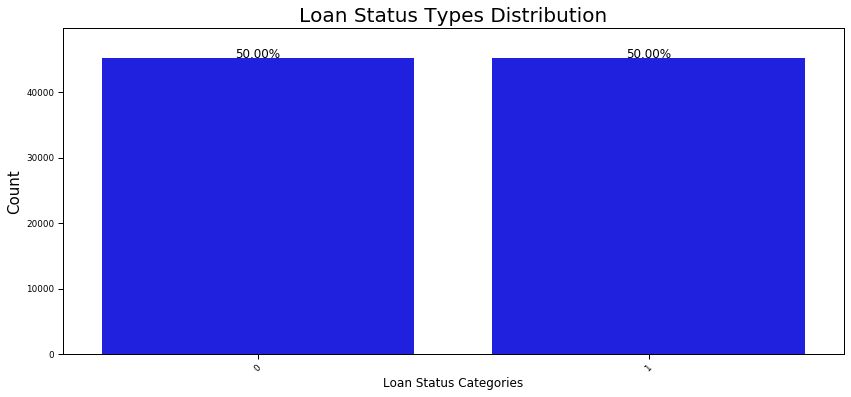

In [126]:
total = len(under_sample)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=under_sample, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show() 

In [127]:
y = under_sample.loan_status
X = under_sample.drop('loan_status',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [128]:
algo = {'Logistic Regression':LogisticRegression(random_state=1),
        'Decision Tree':DecisionTreeClassifier(random_state=1),
        'Random Forest':RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1),
        'Naive Bayes': GaussianNB(),
        'K Nearest Neighbors': KNeighborsClassifier(),
        'Ada Boost':AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=100,random_state=1),
        'XG Boost':XGBClassifier(learning_rate=0.5,random_state=1,n_jobs=-1),
        'Gradient Boost': GradientBoostingClassifier(learning_rate=0.5,random_state=1),
        'Bagging':BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1,n_jobs=-1),n_estimators=50,random_state=1)
       }


for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(k,':\n')
    print("Accuracy train = " , model.score(X_train,y_train))
    print("Accuracy test = " , accuracy_score(y_test,y_pred))
    print("Precision = " ,precision_score(y_test,y_pred))
    print("Recall = " ,recall_score(y_test,y_pred))
    print('')
    print("F1 Score = " ,f1_score(y_test,y_pred))
    print('Roc-Auc score = ',roc_auc_score(y_test,y_pred))
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n',classification_report(y_test,y_pred))
    print('')
    print('____________________________________________________________________________________________________')

C:\Users\Dhruv\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression :

Accuracy train =  0.8995690403649739
Accuracy test =  0.8993333087774872
Precision =  0.9633399465194514
Recall =  0.8287325615909765

F1 Score =  0.8909808927360484
Roc-Auc score =  0.898824702502502
Confusion matrix: 
[[13248   425]
 [ 2308 11168]]

               precision    recall  f1-score   support

           0       0.85      0.97      0.91     13673
           1       0.96      0.83      0.89     13476

    accuracy                           0.90     27149
   macro avg       0.91      0.90      0.90     27149
weighted avg       0.91      0.90      0.90     27149


____________________________________________________________________________________________________
Decision Tree :

Accuracy train =  1.0
Accuracy test =  0.9173818556852923
Precision =  0.9134948096885813
Recall =  0.9207479964381122

F1 Score =  0.9171070623452456
Roc-Auc score =  0.9174061052913884
Confusion matrix: 
[[12498  1175]
 [ 1068 12408]]

               precision    recall  f1-s

We tried to Balance the dataset by using Undersampling technique. In the previous models the algorithmns could predict the Fully paid borrowers with ease and hence sometimes used to even predict charged off borrowers into the fully paid category.
To even it out we used Undersampling.

Here we can again see that the Ensemble techniques are performing really well. F1- Score and roc-auc scores are very good.
Yet the model misclassifies a little.

Pros of this model:
    
    Both categories are equally balanced.
    
Cons:
    
    Loss of Potentially good data.